In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

In [4]:
df = pd.read_csv("Analysis/GoldCoast_network.csv")
df_edges = df[["From","To"]]
df_edges

,From,To
0,1,1371
1,2,2012
2,3,2402
3,4,1875
4,5,1880
...,...,...
11135,4806,1495
11136,4806,3606
11137,4806,415
11138,4807,1433


In [10]:
G = nx.from_pandas_edgelist(df_edges,source = "From", target="To", create_using=nx.DiGraph())


In [7]:
bc = nx.betweenness_centrality(G, seed=42)

In [80]:
bc_sorted = sorted(bc.items(), key=lambda item: item[1], reverse=True)

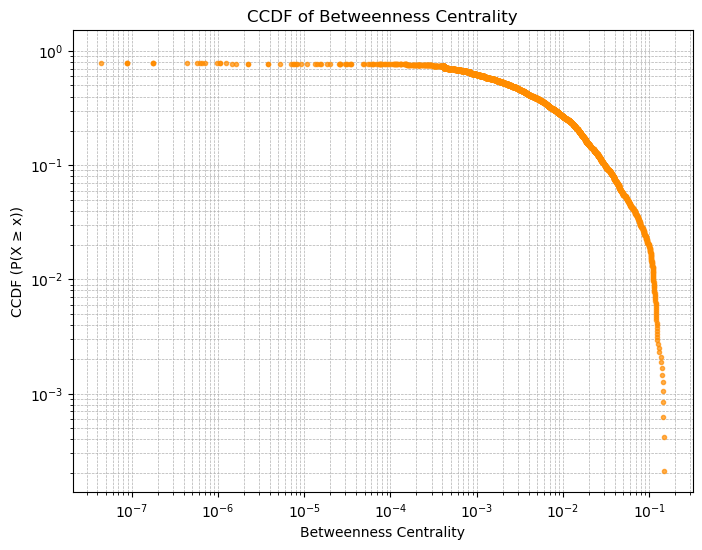

In [82]:
bc_values = np.sort([v for _, v in bc_sorted])
ccdf = 1.0 - np.arange(1, len(bc_values) + 1) / len(bc_values)

# Plot CCDF
plt.figure(figsize=(8, 6))
plt.plot(bc_values, ccdf, marker='.', linestyle='none', color='darkorange', alpha=0.7)
plt.xscale('log')  # Betweenness is usually plotted on a log scale
plt.yscale('log')  # Same for CCDF
plt.xlabel('Betweenness Centrality')
plt.ylabel('CCDF (P(X ≥ x))')
plt.title('CCDF of Betweenness Centrality')
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()

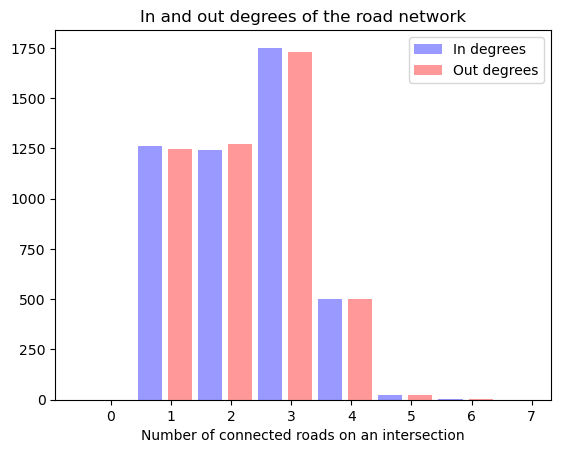

In [68]:
in_degrees = list(dict(G.in_degree()).values())
out_degrees = list(dict(G.out_degree()).values())

bins = np.arange(0, max(in_degrees + out_degrees) + 2) - 0.55
plt.hist(in_degrees, bins=bins, color='blue', width=0.4, alpha=0.4, label='In degrees')
plt.hist(out_degrees, bins=bins + 0.5, color='red', width=0.4, alpha=0.4, label='Out degrees')
plt.title('In and out degrees of the road network')
plt.xlabel('Number of connected roads on an intersection')
plt.legend()
plt.show()

In [22]:
G_weighted = nx.from_pandas_edgelist(df, 'From', 'To', edge_attr='Capacity', create_using=nx.DiGraph())

In [71]:
edges_sorted_by_weight = sorted(G_weighted.edges(data=True), key=lambda x: x[2]['Capacity'], reverse=True)


Text(0, 0.5, 'Roads (edges)')

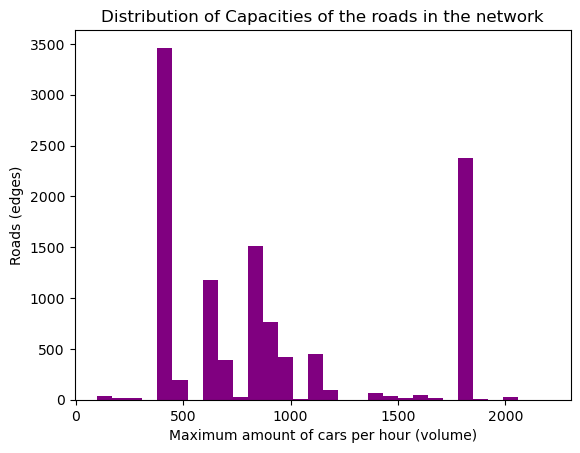

In [70]:
plt.hist([data['Capacity'] for _, _, data in G_weighted.edges(data=True)], bins=30, color='purple')
plt.title('Distribution of Capacities of the roads in the network')
plt.xlabel('Maximum amount of cars per hour (volume)')
plt.ylabel('Roads (edges)')